YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Error downloading data: unsupported format string passed to Series.__format__
Using default price.

Binomial Option Pricing Results:
Current Stock Price (S0): $150.00
Up Price (Su): $165.00
Down Price (Sd): $135.00
Strike Price (K): $157.50
Risk-neutral probability (p): 0.7564
Call payoff if up (Cu): $7.50
Call payoff if down (Cd): $0.00
Option Price (C0): $5.40


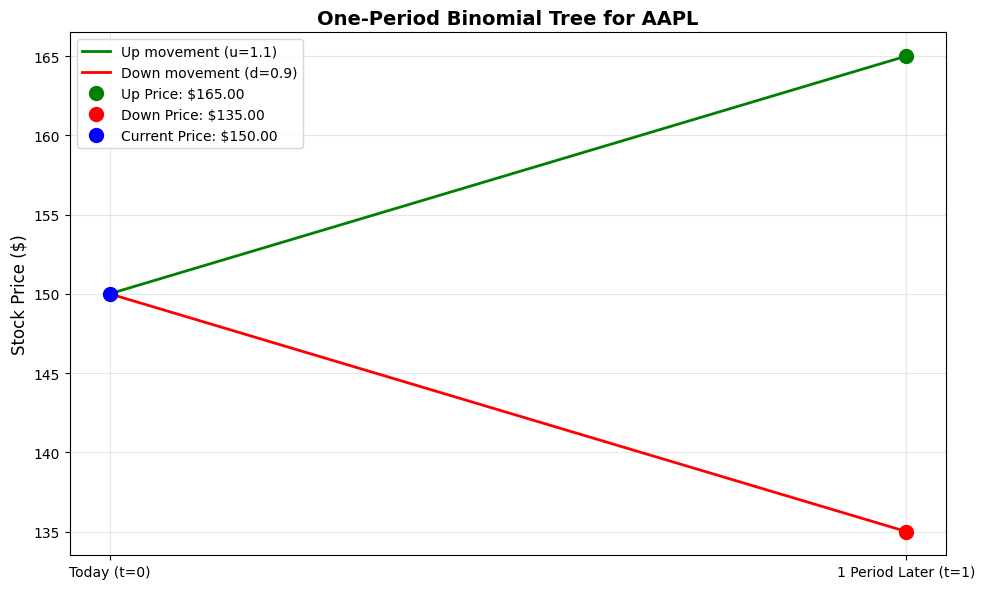


Key Variables:
S0 = 150.00
Su = 165.00
Sd = 135.00
K = 157.50
Cu = 7.50
Cd = 0.00
C0 = 5.40
p = 0.7564


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fetch real AAPL stock price with error handling
ticker = 'AAPL'
try:
    data = yf.download(ticker, period='5d', interval='1d')
    if data.empty:
        print(f"No data received for {ticker}. Using default price.")
        S0 = 150.0  # Default AAPL price
    else:
        S0 = data['Close'].iloc[-1]  # Use iloc instead of [] for safer indexing
        print(f"Current {ticker} price: ${S0:.2f}")
except Exception as e:
    print(f"Error downloading data: {e}")
    print("Using default price.")
    S0 = 150.0  # Default AAPL price

# Step 2: Define model parameters
u = 1.1           # Up factor
d = 0.9           # Down factor
r = 0.05          # Risk-free rate
K = S0 * 1.05     # Strike price (5% above current price)
T = 1             # 1 year
dt = 1            # one-period
discount_factor = np.exp(-r * dt)

# Step 3: Calculate possible future prices
Su = S0 * u       # Price if up
Sd = S0 * d       # Price if down

# Step 4: Risk-neutral probability
p = (np.exp(r * dt) - d) / (u - d)

# Step 5: Option payoff at maturity (Call)
Cu = max(0, Su - K)
Cd = max(0, Sd - K)

# Step 6: Backward induction to find option price
C0 = discount_factor * (p * Cu + (1 - p) * Cd)

# Step 7: Display results
print(f"\nBinomial Option Pricing Results:")
print(f"Current Stock Price (S0): ${S0:.2f}")
print(f"Up Price (Su): ${Su:.2f}")
print(f"Down Price (Sd): ${Sd:.2f}")
print(f"Strike Price (K): ${K:.2f}")
print(f"Risk-neutral probability (p): {p:.4f}")
print(f"Call payoff if up (Cu): ${Cu:.2f}")
print(f"Call payoff if down (Cd): ${Cd:.2f}")
print(f"Option Price (C0): ${C0:.2f}")

# Step 8: Visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [S0, Su], 'g-', lw=2, label=f'Up movement (u={u})')
ax.plot([0, 1], [S0, Sd], 'r-', lw=2, label=f'Down movement (d={d})')
ax.plot(1, Su, 'go', markersize=10, label=f'Up Price: ${Su:.2f}')
ax.plot(1, Sd, 'ro', markersize=10, label=f'Down Price: ${Sd:.2f}')
ax.plot(0, S0, 'bo', markersize=10, label=f'Current Price: ${S0:.2f}')
ax.set_title(f"One-Period Binomial Tree for {ticker}", fontsize=14, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(["Today (t=0)", "1 Period Later (t=1)"])
ax.set_ylabel("Stock Price ($)", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the key variables
print(f"\nKey Variables:")
print(f"S0 = {S0:.2f}")
print(f"Su = {Su:.2f}")
print(f"Sd = {Sd:.2f}")
print(f"K = {K:.2f}")
print(f"Cu = {Cu:.2f}")
print(f"Cd = {Cd:.2f}")
print(f"C0 = {C0:.2f}")
print(f"p = {p:.4f}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Error downloading data: unsupported format string passed to Series.__format__

Multi-Period Binomial Option Pricing (European Call)
Periods (N): 5
Up factor (u): 1.0936
Down factor (d): 0.9144
Risk-neutral probability (p): 0.5338
Strike Price (K): $157.50
Option Price (C0): $12.19

Final Payoffs at Maturity:
   Final Stock Price  Call Payoff
0          95.911098     0.000000
1         114.698522     0.000000
2         137.166097     0.000000
3         164.034704     6.534704
4         196.166434    38.666434
5         234.592247    77.092247


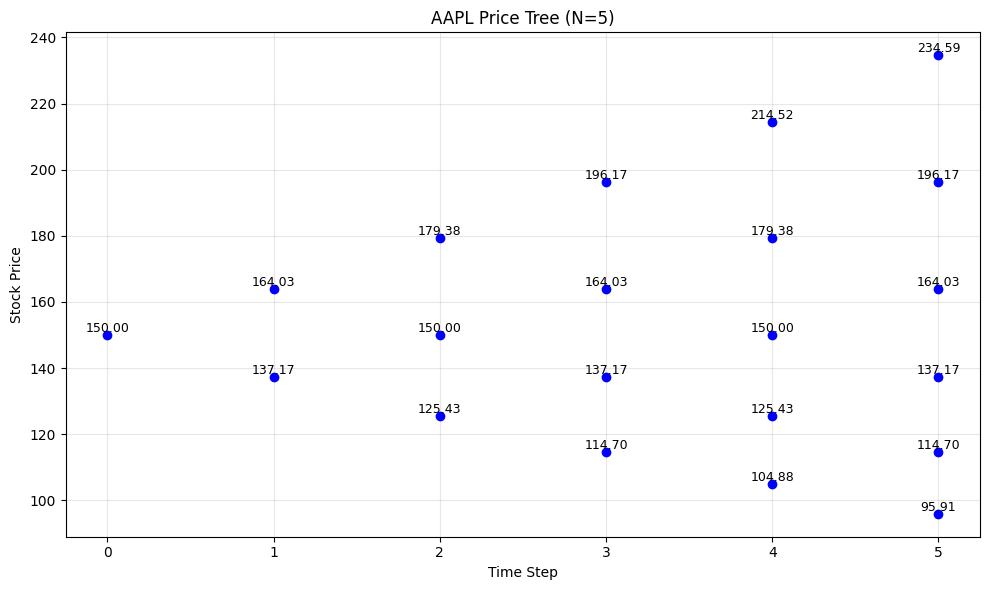

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fetch real AAPL stock price with error handling
ticker = 'AAPL'
try:
    data = yf.download(ticker, period='5d', interval='1d')
    if data.empty:
        print(f"No data received for {ticker}. Using default price.")
        S0 = 150.0
    else:
        S0 = data['Close'].iloc[-1]
        print(f"Current {ticker} price: ${S0:.2f}")
except Exception as e:
    print(f"Error downloading data: {e}")
    S0 = 150.0

# Step 2: Define model parameters
T = 1              # Total time in years
N = 5              # Number of periods
dt = T / N         # Time step
r = 0.05           # Risk-free interest rate

# Cox-Ross-Rubinstein model parameters
u = np.exp(0.2 * np.sqrt(dt))     # Up factor
d = 1 / u                         # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
discount = np.exp(-r * dt)

K = S0 * 1.05  # Strike price (5% above S0)

# Step 3: Generate asset prices at maturity
ST = np.array([S0 * (u ** j) * (d ** (N - j)) for j in range(N + 1)])

# Step 4: Compute payoff at maturity (European Call)
option_values = np.maximum(ST - K, 0)

# Step 5: Backward induction
for i in range(N - 1, -1, -1):
    option_values = discount * (p * option_values[1:i + 2] + (1 - p) * option_values[0:i + 1])

# Step 6: Output the result
C0 = option_values[0]
print(f"\nMulti-Period Binomial Option Pricing (European Call)")
print(f"Periods (N): {N}")
print(f"Up factor (u): {u:.4f}")
print(f"Down factor (d): {d:.4f}")
print(f"Risk-neutral probability (p): {p:.4f}")
print(f"Strike Price (K): ${K:.2f}")
print(f"Option Price (C0): ${C0:.2f}")

# Step 7: Visualization of final stock prices and payoffs
import pandas as pd
df = pd.DataFrame({
    'Final Stock Price': ST,
    'Call Payoff': np.maximum(ST - K, 0)
})
print("\nFinal Payoffs at Maturity:")
print(df)

# Step 8: Optional tree visualization (limited to small N)
if N <= 5:
    tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            tree[j, i] = S0 * (u**j) * (d**(i - j))

    plt.figure(figsize=(10, 6))
    for i in range(N+1):
        for j in range(i+1):
            plt.plot(i, tree[j, i], 'bo')
            plt.text(i, tree[j, i], f"{tree[j, i]:.2f}", fontsize=9, ha='center', va='bottom')

    plt.title(f"{ticker} Price Tree (N={N})")
    plt.xlabel("Time Step")
    plt.ylabel("Stock Price")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


[*********************100%***********************]  1 of 1 completed

Using fallback price.

CRR Model for European Options (N=5 steps)
Up factor (u): 1.0936
Down factor (d): 0.9144
Risk-neutral probability (p): 0.5338
Strike price (K): $157.50
European Call Option Price: $12.19
European Put Option Price:  $12.01

Payoffs at Maturity:
   Final Price  Call Payoff  Put Payoff
0    95.911098     0.000000   61.588902
1   114.698522     0.000000   42.801478
2   137.166097     0.000000   20.333903
3   164.034704     6.534704    0.000000
4   196.166434    38.666434    0.000000
5   234.592247    77.092247    0.000000


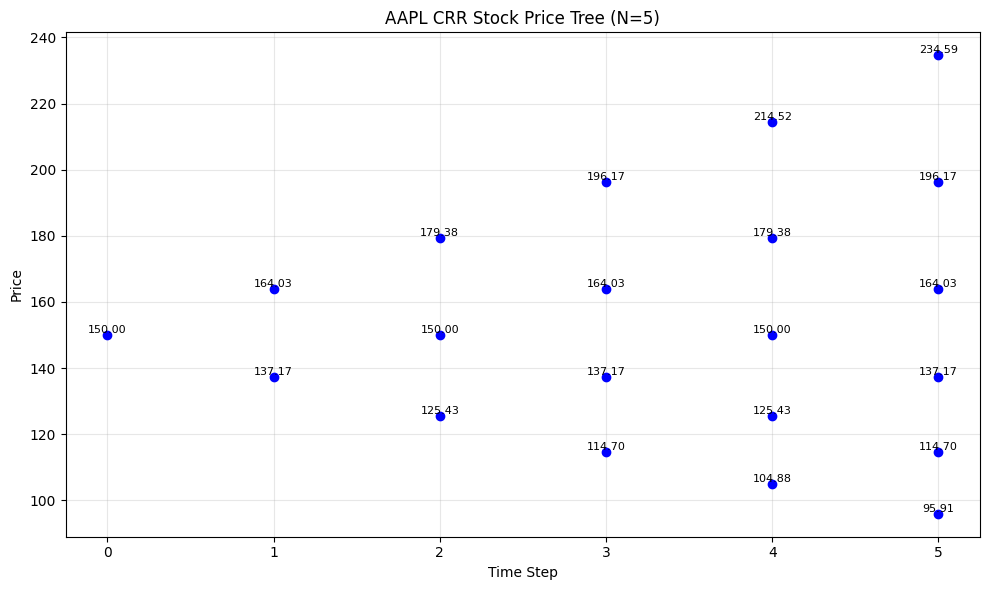

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download real stock data or use fallback price
ticker = 'AAPL'
try:
    data = yf.download(ticker, period='5d', interval='1d')
    if data.empty:
        raise ValueError("No data found.")
    S0 = data['Close'].iloc[-1]
    print(f"Fetched {ticker} price: ${S0:.2f}")
except:
    print("Using fallback price.")
    S0 = 150.0

# Step 2: Define CRR model parameters
T = 1                 # Time to maturity (years)
N = 5                 # Number of time steps
r = 0.05              # Risk-free interest rate
sigma = 0.2           # Volatility
K = S0 * 1.05         # Strike price (5% above S0)

dt = T / N            # Time per step
u = np.exp(sigma * np.sqrt(dt))       # Up factor
d = 1 / u                                 # Down factor
p = (np.exp(r * dt) - d) / (u - d)       # Risk-neutral probability
discount = np.exp(-r * dt)

# Step 3: Initialize asset prices at maturity
ST = np.array([S0 * (u**j) * (d**(N-j)) for j in range(N+1)])

# Step 4: Calculate payoffs at maturity
call_values = np.maximum(ST - K, 0)
put_values = np.maximum(K - ST, 0)

# Step 5: Backward induction for Call and Put
for i in range(N-1, -1, -1):
    call_values = discount * (p * call_values[1:i+2] + (1 - p) * call_values[0:i+1])
    put_values = discount * (p * put_values[1:i+2] + (1 - p) * put_values[0:i+1])

# Step 6: Output results
print(f"\nCRR Model for European Options (N={N} steps)")
print(f"Up factor (u): {u:.4f}")
print(f"Down factor (d): {d:.4f}")
print(f"Risk-neutral probability (p): {p:.4f}")
print(f"Strike price (K): ${K:.2f}")
print(f"European Call Option Price: ${call_values[0]:.2f}")
print(f"European Put Option Price:  ${put_values[0]:.2f}")

# Step 7: Final payoff table
import pandas as pd
final_prices = [S0 * (u**j) * (d**(N-j)) for j in range(N+1)]
df = pd.DataFrame({
    'Final Price': final_prices,
    'Call Payoff': np.maximum(np.array(final_prices) - K, 0),
    'Put Payoff': np.maximum(K - np.array(final_prices), 0)
})
print("\nPayoffs at Maturity:")
print(df)

# Step 8: Optional: Visualize the binomial tree (stock prices only)
if N <= 6:
    tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            tree[j, i] = S0 * (u**j) * (d**(i-j))

    plt.figure(figsize=(10, 6))
    for i in range(N+1):
        for j in range(i+1):
            plt.plot(i, tree[j, i], 'bo')
            plt.text(i, tree[j, i], f'{tree[j, i]:.2f}', fontsize=8, ha='center', va='bottom')
    plt.title(f"{ticker} CRR Stock Price Tree (N={N})")
    plt.xlabel("Time Step")
    plt.ylabel("Price")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


[*********************100%***********************]  1 of 1 completed

Fallback price used.

CRR Model (N=5 steps)
European Call Price: $12.19
American Call Price: $12.19
European Put Price:  $12.01
American Put Price:  $13.09

Payoffs at Maturity:
   Final Price  Call Payoff  Put Payoff
0    95.911098     0.000000   61.588902
1   114.698522     0.000000   42.801478
2   137.166097     0.000000   20.333903
3   164.034704     6.534704    0.000000
4   196.166434    38.666434    0.000000
5   234.592247    77.092247    0.000000


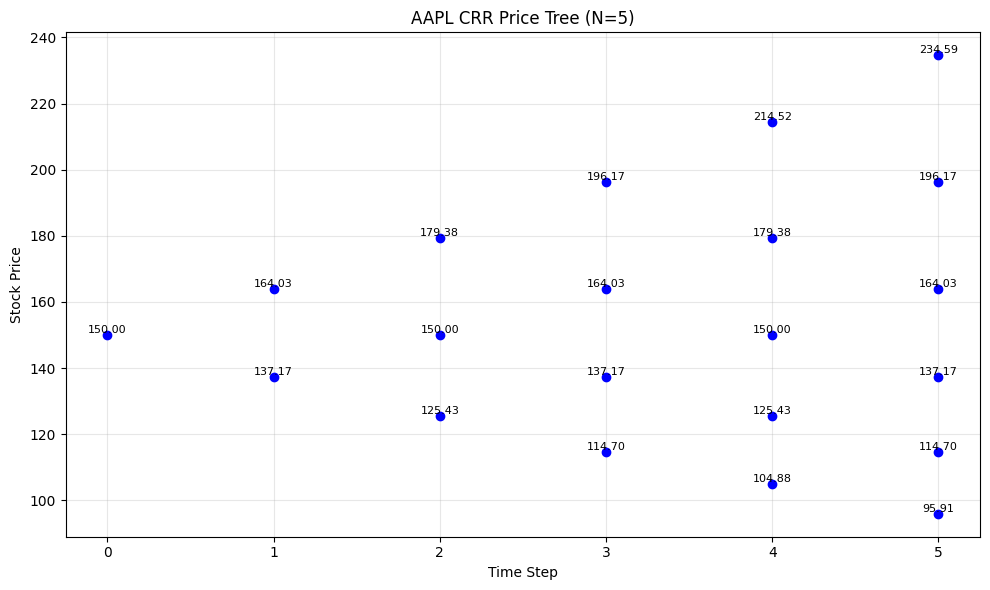

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fetch real stock price
ticker = 'AAPL'
try:
    data = yf.download(ticker, period='5d', interval='1d')
    if data.empty:
        raise ValueError("No data.")
    S0 = data['Close'].iloc[-1]
    print(f"Fetched {ticker} price: ${S0:.2f}")
except:
    S0 = 150.0
    print("Fallback price used.")

# Step 2: Parameters
T = 1                # Maturity in years
N = 5                # Time steps
r = 0.05             # Risk-free rate
sigma = 0.2          # Volatility
K = S0 * 1.05        # Strike price (5% above spot)

dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)
discount = np.exp(-r * dt)

# Step 3: Asset prices at maturity
S = np.array([S0 * (u ** j) * (d ** (N - j)) for j in range(N + 1)])

# Step 4: Payoff at maturity
european_call = np.maximum(S - K, 0)
american_call = european_call.copy()
european_put = np.maximum(K - S, 0)
american_put = european_put.copy()

# Step 5: Backward induction
for i in range(N - 1, -1, -1):
    S = np.array([S0 * (u ** j) * (d ** (i - j)) for j in range(i + 1)])
    
    # Discounted expected value
    european_call = discount * (p * european_call[1:] + (1 - p) * european_call[:-1])
    european_put = discount * (p * european_put[1:] + (1 - p) * european_put[:-1])
    
    # Early exercise check
    american_call = np.maximum(S - K, discount * (p * american_call[1:] + (1 - p) * american_call[:-1]))
    american_put = np.maximum(K - S, discount * (p * american_put[1:] + (1 - p) * american_put[:-1]))

# Step 6: Results
print(f"\nCRR Model (N={N} steps)")
print(f"European Call Price: ${european_call[0]:.2f}")
print(f"American Call Price: ${american_call[0]:.2f}")
print(f"European Put Price:  ${european_put[0]:.2f}")
print(f"American Put Price:  ${american_put[0]:.2f}")

# Step 7: Final stock and payoff table
final_stock_prices = [S0 * (u ** j) * (d ** (N - j)) for j in range(N + 1)]
df = pd.DataFrame({
    'Final Price': final_stock_prices,
    'Call Payoff': np.maximum(np.array(final_stock_prices) - K, 0),
    'Put Payoff': np.maximum(K - np.array(final_stock_prices), 0)
})
print("\nPayoffs at Maturity:")
print(df)

# Step 8: Optional: Visualize stock tree
if N <= 6:
    tree = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        for j in range(i + 1):
            tree[j, i] = S0 * (u ** j) * (d ** (i - j))

    plt.figure(figsize=(10, 6))
    for i in range(N + 1):
        for j in range(i + 1):
            plt.plot(i, tree[j, i], 'bo')
            plt.text(i, tree[j, i], f"{tree[j, i]:.2f}", fontsize=8, ha='center', va='bottom')
    plt.title(f"{ticker} CRR Price Tree (N={N})")
    plt.xlabel("Time Step")
    plt.ylabel("Stock Price")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [4]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch stock price
ticker = 'AAPL'
try:
    data = yf.download(ticker, period='5d', interval='1d')
    if data.empty:
        raise ValueError("No data found.")
    S0 = data['Close'].iloc[-1]
    print(f"Fetched {ticker} price: ${S0:.2f}")
except:
    S0 = 150.0
    print("Using fallback price.")

# Step 2: Parameters
T = 1                    # Time to maturity (in years)
N = 5                    # Number of steps
r = 0.05                 # Risk-free rate
sigma = 0.2              # Volatility
K = S0 * 1.05            # Strike price
option_type = 'call'     # 'call' or 'put'

# Step 3a: Proportional dividend yield
q = 0.02                 # 2% dividend yield

# Step 3b: Fixed dividend (uncomment if used)
use_fixed_dividend = False
D = 2.0                  # $2 cash dividend
div_time = 0.5          # Paid at t = 0.5 years

# Adjust S0 for fixed dividend
if use_fixed_dividend:
    S0 = S0 - D * np.exp(-r * div_time)
    print(f"Adjusted S0 for fixed dividend: ${S0:.2f}")

# Step 4: Tree parameters
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp((r - q) * dt) - d) / (u - d)
discount = np.exp(-r * dt)

# Step 5: Generate asset prices at maturity
ST = np.array([S0 * (u**j) * (d**(N-j)) for j in range(N+1)])

# Step 6: Payoff at maturity
if option_type == 'call':
    values = np.maximum(ST - K, 0)
else:
    values = np.maximum(K - ST, 0)

# Step 7: Backward induction
for i in range(N-1, -1, -1):
    values = discount * (p * values[1:] + (1 - p) * values[:-1])

# Step 8: Output
print(f"\nCRR Model with Dividend Support (N={N})")
print(f"Dividend type: {'Fixed' if use_fixed_dividend else 'Proportional'}")
print(f"Option Type: {option_type.capitalize()}")
print(f"Strike Price: ${K:.2f}")
print(f"Option Price: ${values[0]:.2f}")
print(f"Proportional dividend yield (q): {q if not use_fixed_dividend else 0:.4f}")
print(f"Fixed dividend used: ${D if use_fixed_dividend else 0}")

# Optional: Export to CSV
export = False
if export:
    df = pd.DataFrame({'Final Prices': ST, 'Payoffs': values})
    df.to_csv("dividend_crr_output.csv", index=False)


[*********************100%***********************]  1 of 1 completed

Using fallback price.

CRR Model with Dividend Support (N=5)
Dividend type: Proportional
Option Type: Call
Strike Price: $157.50
Option Price: $10.69
Proportional dividend yield (q): 0.0200
Fixed dividend used: $0


In [5]:
import numpy as np
from collections import defaultdict
import yfinance as yf

# Step 1: Market and model parameters
ticker = 'AAPL'
try:
    data = yf.download(ticker, period='5d', interval='1d')
    if data.empty:
        raise ValueError("No data.")
    S0 = data['Close'].iloc[-1]
    print(f"Fetched {ticker} price: ${S0:.2f}")
except:
    S0 = 150.0
    print("Using fallback price.")

T = 1                  # 1 year
N = 4                  # Binomial steps (keep small for exotic options)
K = S0 * 1.05          # Strike price
r = 0.05               # Risk-free rate
sigma = 0.2            # Volatility
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
discount = np.exp(-r * dt)
p = (np.exp(r * dt) - d) / (u - d)

# Choose exotic option type
option_type = 'asian'  # 'asian', 'barrier', 'lookback'
call_or_put = 'call'   # 'call' or 'put'

# Barrier parameters
barrier = S0 * 1.1     # Only for barrier option
barrier_type = 'up-out'  # 'up-in', 'up-out', 'down-in', 'down-out'

# Helper functions
def payoff(price, strike, option='call'):
    return max(price - strike, 0) if option == 'call' else max(strike - price, 0)

# Step 2: Build state tree
states = defaultdict(dict)
states[0][(S0, S0, S0, False)] = 1  # (current_price, avg, max/min, barrier_crossed): prob

for t in range(1, N+1):
    prev = states[t-1]
    curr = defaultdict(float)
    for (price, avg, extremum, crossed), prob in prev.items():
        for direction, factor, prob_direction in [('u', u, p), ('d', d, 1 - p)]:
            new_price = price * factor
            new_avg = (avg * (t-1) + new_price) / t
            new_max = max(extremum, new_price)
            new_min = min(extremum, new_price)
            
            # Barrier logic
            crossed_now = crossed
            if option_type == 'barrier':
                if 'up' in barrier_type and new_price >= barrier:
                    crossed_now = True
                elif 'down' in barrier_type and new_price <= barrier:
                    crossed_now = True
                    
            key = (new_price, new_avg, new_max if call_or_put == 'call' else new_min, crossed_now)
            curr[key] += prob * prob_direction
    states[t] = curr

# Step 3: Compute payoff at maturity
final_values = []
for (price, avg, ex, crossed), prob in states[N].items():
    if option_type == 'asian':
        val = payoff(avg, K, call_or_put)
    elif option_type == 'lookback':
        if call_or_put == 'call':
            val = ex - K
        else:
            val = K - ex
        val = max(val, 0)
    elif option_type == 'barrier':
        if ('in' in barrier_type and not crossed) or ('out' in barrier_type and crossed):
            val = 0  # deactivated
        else:
            val = payoff(price, K, call_or_put)
    else:
        val = 0
    final_values.append(prob * val)

# Step 4: Discount to present
option_price = discount**N * sum(final_values)

# Step 5: Display results
print(f"\nExotic Option Pricing with CRR (N={N})")
print(f"Option type: {option_type.upper()} ({call_or_put})")
if option_type == 'barrier':
    print(f"Barrier Type: {barrier_type}, Barrier Level: {barrier:.2f}")
print(f"Strike Price: ${K:.2f}")
print(f"Option Price: ${option_price:.4f}")


[*********************100%***********************]  1 of 1 completed

Using fallback price.

Exotic Option Pricing with CRR (N=4)
Option type: ASIAN (call)
Strike Price: $157.50
Option Price: $7.0497


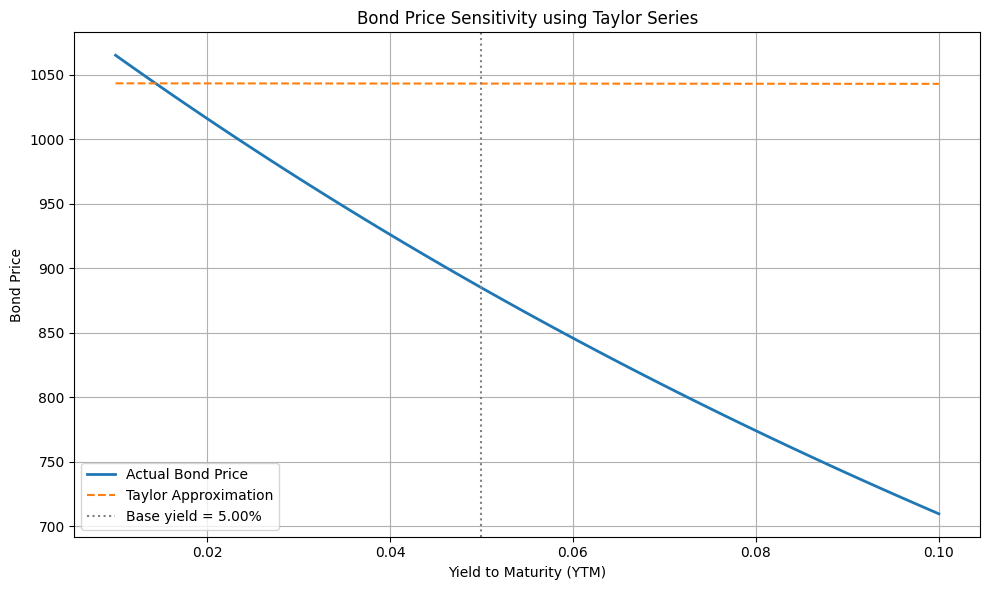

Base Price: $1043.29
Duration: 4.4778 years
Convexity: 23.4441


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- Bond Parameters ---
face_value = 1000     # Bond face value
coupon_rate = 0.06    # 6% annual coupon
maturity = 5          # 5 years
frequency = 1         # Annual coupons
y0 = 0.05             # Base yield to maturity (5%)

# --- Derived ---
N = int(maturity * frequency)
C = face_value * coupon_rate / frequency
dt = 1 / frequency

# --- Bond Pricing Function ---
def bond_price(y):
    price = sum([C / (1 + y)**t for t in range(1, N + 1)])
    price += face_value / (1 + y)**N
    return price

# --- First Derivative: Duration ---
def macaulay_duration(y):
    pv_coupons = np.array([t * C / (1 + y)**t for t in range(1, N + 1)])
    pv_face = N * face_value / (1 + y)**N
    price = bond_price(y)
    return (np.sum(pv_coupons) + pv_face) / price

# --- Second Derivative: Convexity ---
def convexity(y):
    pv_coupons = np.array([t * (t + 1) * C / (1 + y)**(t + 2) for t in range(1, N + 1)])
    pv_face = N * (N + 1) * face_value / (1 + y)**(N + 2)
    price = bond_price(y)
    return (np.sum(pv_coupons) + pv_face) / price

# --- Base price and sensitivities ---
P0 = bond_price(y0)
D = macaulay_duration(y0)
C = convexity(y0)

# --- Taylor Approximation vs Actual ---
yields = np.linspace(0.01, 0.10, 100)
actual_prices = [bond_price(y) for y in yields]
taylor_prices = [P0 - D * (y - y0) + 0.5 * C * (y - y0)**2 for y in yields]

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(yields, actual_prices, label='Actual Bond Price', linewidth=2)
plt.plot(yields, taylor_prices, label='Taylor Approximation', linestyle='--')
plt.axvline(y0, color='gray', linestyle=':', label=f'Base yield = {y0:.2%}')
plt.title("Bond Price Sensitivity using Taylor Series")
plt.xlabel("Yield to Maturity (YTM)")
plt.ylabel("Bond Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print Key Outputs ---
print(f"Base Price: ${P0:.2f}")
print(f"Duration: {D:.4f} years")
print(f"Convexity: {C:.4f}")


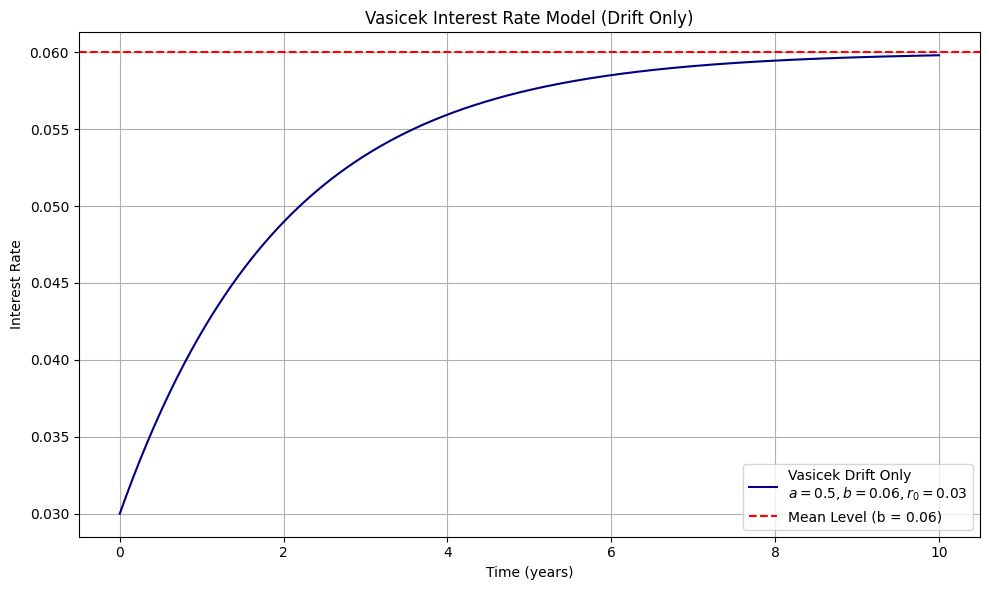

Final interest rate after 10 years: 0.0598


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Vasicek Parameters ---
a = 0.5     # Speed of mean reversion
b = 0.06    # Long-term mean interest rate (6%)
r0 = 0.03   # Initial interest rate (3%)

# --- Time Grid ---
T = 10              # Total time in years
N = 1000            # Number of time points
t = np.linspace(0, T, N)

# --- ODE Definition ---
def vasicek_drift_only(r, t, a, b):
    return a * (b - r)

# --- Solve ODE ---
r_t = odeint(vasicek_drift_only, r0, t, args=(a, b)).flatten()

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(t, r_t, label=f'Vasicek Drift Only\n$a={a}, b={b}, r_0={r0}$', color='navy')
plt.axhline(b, color='red', linestyle='--', label=f'Mean Level (b = {b})')
plt.title('Vasicek Interest Rate Model (Drift Only)')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Final Output ---
print(f"Final interest rate after {T} years: {r_t[-1]:.4f}")


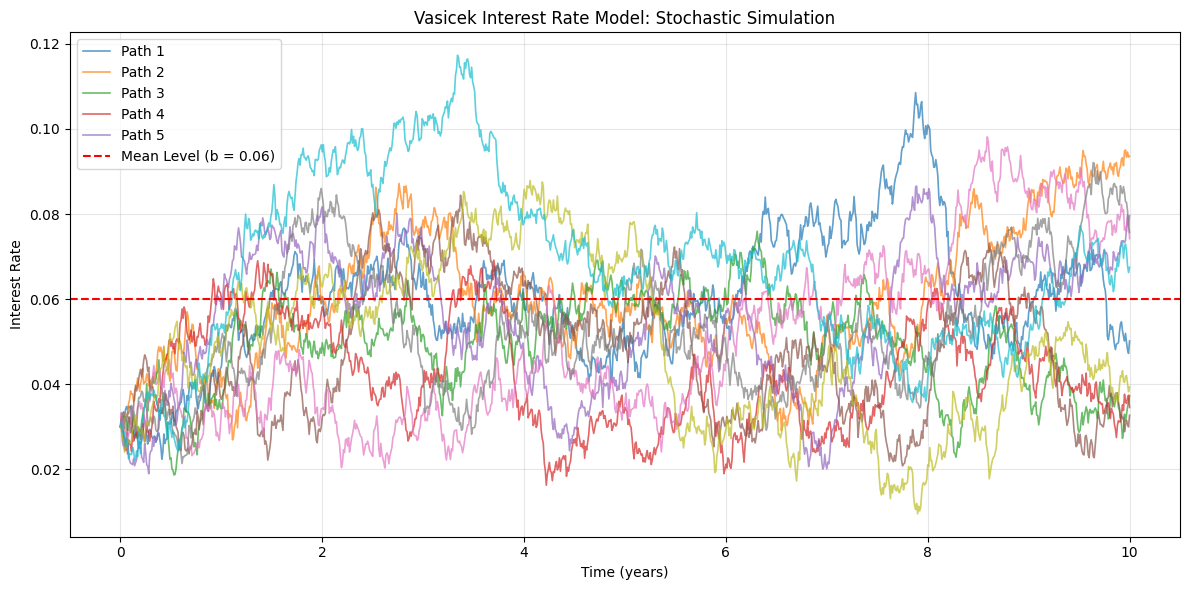

Final simulated interest rates:
[0.0502 0.0936 0.0373 0.0345 0.0796 0.0327 0.0742 0.0757 0.0393 0.0675]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Model Parameters ---
a = 0.5         # Speed of mean reversion
b = 0.06        # Long-term mean interest rate
sigma = 0.02    # Volatility
r0 = 0.03       # Initial rate

T = 10          # Total time in years
N = 1000        # Number of time steps
dt = T / N      # Time step size
M = 10          # Number of simulation paths

# --- Time Vector ---
t = np.linspace(0, T, N+1)

# --- Initialize Matrix for Simulations ---
r = np.zeros((M, N+1))
r[:, 0] = r0

# --- Monte Carlo Simulation ---
np.random.seed(42)
for i in range(N):
    Z = np.random.normal(0, 1, M)             # Brownian increments
    dr = a * (b - r[:, i]) * dt + sigma * np.sqrt(dt) * Z
    r[:, i+1] = r[:, i] + dr

# --- Plotting ---
plt.figure(figsize=(12, 6))
for i in range(M):
    plt.plot(t, r[i], lw=1.2, label=f'Path {i+1}' if i < 5 else "", alpha=0.7)
plt.axhline(b, color='red', linestyle='--', label=f'Mean Level (b = {b})')
plt.title("Vasicek Interest Rate Model: Stochastic Simulation")
plt.xlabel("Time (years)")
plt.ylabel("Interest Rate")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --- Print Final Rates ---
print("Final simulated interest rates:")
print(np.round(r[:, -1], 4))


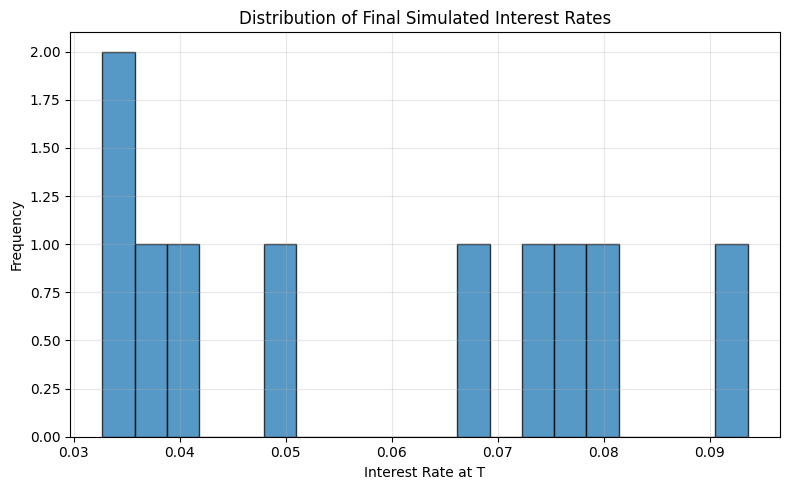

In [9]:
# --- Histogram of final rates ---
plt.figure(figsize=(8, 5))
plt.hist(r[:, -1], bins=20, edgecolor='black', alpha=0.75)
plt.title("Distribution of Final Simulated Interest Rates")
plt.xlabel("Interest Rate at T")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


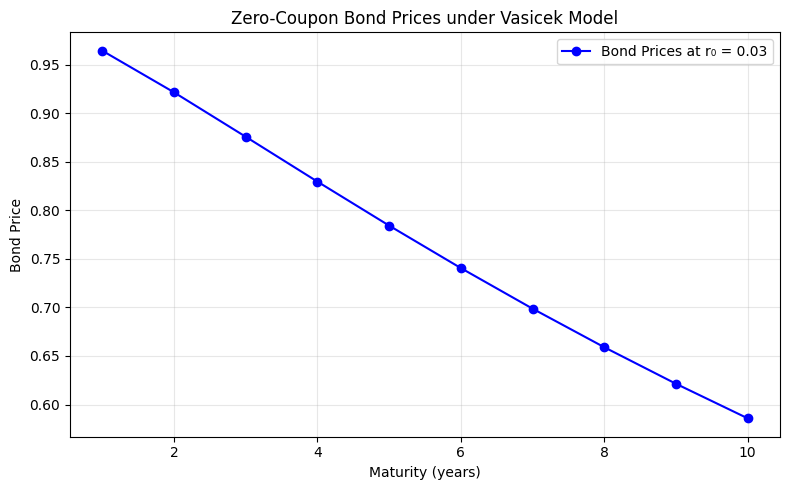

In [10]:
def vasicek_zero_coupon_bond_price(r_t, t, T, a, b, sigma):
    B = (1 - np.exp(-a * (T - t))) / a
    A = np.exp((b - (sigma**2) / (2 * a**2)) * (B - (T - t)) - (sigma**2 / (4 * a)) * B**2)
    return A * np.exp(-B * r_t)

# Example: compute prices at t = 0, for different maturities
maturities = np.arange(1, 11)
prices = [vasicek_zero_coupon_bond_price(r0, 0, Tm, a, b, sigma) for Tm in maturities]

plt.figure(figsize=(8, 5))
plt.plot(maturities, prices, 'o-', color='blue', label=f'Bond Prices at r₀ = {r0}')
plt.title("Zero-Coupon Bond Prices under Vasicek Model")
plt.xlabel("Maturity (years)")
plt.ylabel("Bond Price")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Option price at S0 = 100 using PDE: $1964294219111122231237241170508680053915648.0000


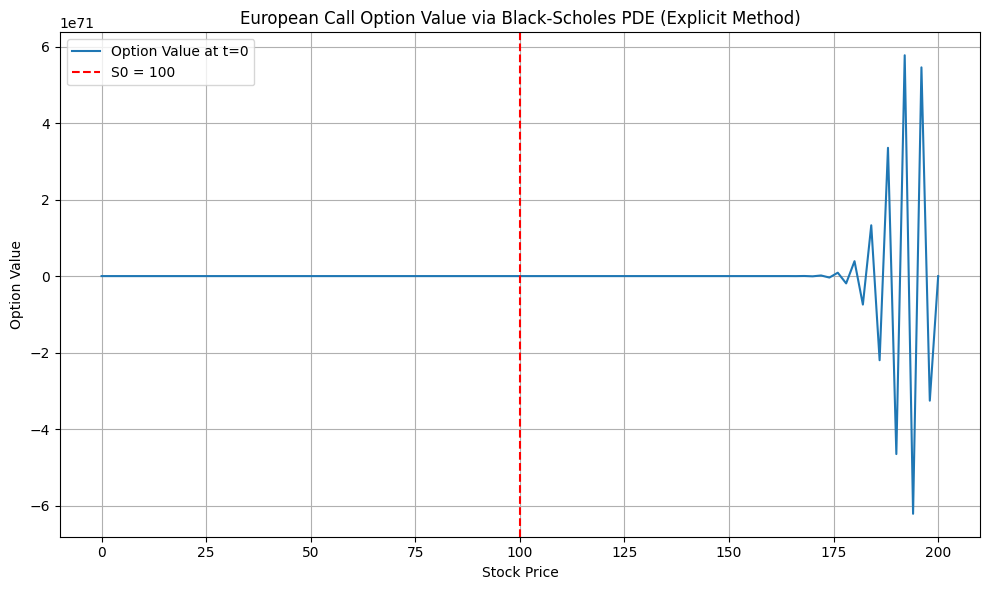

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S_max = 200         # Maximum stock price
K = 100             # Strike price
T = 1.0             # Time to maturity (in years)
r = 0.05            # Risk-free rate
sigma = 0.2         # Volatility

# Grid parameters
M = 100             # Number of time steps
N = 100             # Number of stock price steps
dS = S_max / N      # Stock price step
dt = T / M          # Time step

# Set up asset price grid
S = np.linspace(0, S_max, N+1)

# Option values: rows=time steps, columns=stock prices
V = np.zeros((M+1, N+1))

# Terminal condition at maturity (European call)
V[-1] = np.maximum(S - K, 0)

# Boundary conditions
V[:, 0] = 0                         # If S = 0, option worthless
V[:, -1] = S_max - K*np.exp(-r * (T - np.linspace(0, T, M+1)))  # Deep ITM

# Finite difference loop (explicit method)
for i in reversed(range(M)):
    for j in range(1, N):
        delta = (V[i+1, j+1] - V[i+1, j-1]) / (2 * dS)
        gamma = (V[i+1, j+1] - 2*V[i+1, j] + V[i+1, j-1]) / (dS**2)
        V[i, j] = V[i+1, j] + dt * (0.5 * sigma**2 * S[j]**2 * gamma +
                                    r * S[j] * delta - r * V[i+1, j])

# Interpolate to get option price at initial stock price S0
S0 = 100
option_price = np.interp(S0, S, V[0])

print(f"Option price at S0 = {S0} using PDE: ${option_price:.4f}")

# Plot the option value surface at t=0
plt.figure(figsize=(10, 6))
plt.plot(S, V[0], label="Option Value at t=0")
plt.axvline(S0, color='r', linestyle='--', label=f'S0 = {S0}')
plt.title("European Call Option Value via Black-Scholes PDE (Explicit Method)")
plt.xlabel("Stock Price")
plt.ylabel("Option Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import scipy.stats as si

# Black-Scholes vanilla call price
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)

# Down-and-Out Barrier Call using Transition Density Function (Reflection Principle)
def down_and_out_call(S, K, H, T, r, sigma):
    if S <= H:
        return 0.0  # Already knocked out

    # Vanilla Black-Scholes Call
    C_vanilla = bs_call_price(S, K, T, r, sigma)

    # Reflected price and strike
    S_reflected = (H**2) / S

    # Image Call (reflected term)
    lambda_ = (r + 0.5 * sigma ** 2) / (sigma ** 2)
    x1 = np.log(S / K) / (sigma * np.sqrt(T)) + lambda_ * sigma * np.sqrt(T)
    x2 = np.log(S_reflected / K) / (sigma * np.sqrt(T)) + lambda_ * sigma * np.sqrt(T)

    image_term = S_reflected * si.norm.cdf(x2) - K * np.exp(-r * T) * si.norm.cdf(x2 - sigma * np.sqrt(T))

    return C_vanilla - image_term

# Parameters
S0 = 100      # Spot price
K = 100       # Strike price
H = 90        # Down-and-Out Barrier
T = 1.0       # Time to maturity
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility

# Compute Barrier Option Price
price = down_and_out_call(S0, K, H, T, r, sigma)

# Display
print(f"Down-and-Out Call Option Price: ${price:.4f}")


Down-and-Out Call Option Price: $8.3598


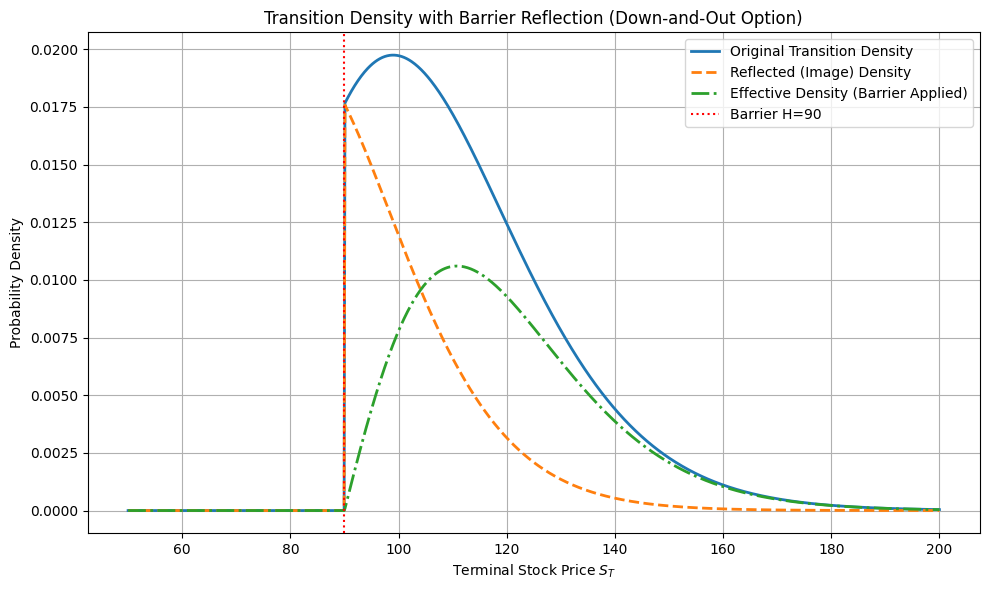

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100       # Initial stock price
H = 90         # Down-and-out barrier
T = 1.0        # Time to maturity
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility

# Log-normal distribution parameters
mu = (r - 0.5 * sigma**2) * T + np.log(S0)
std = sigma * np.sqrt(T)

# Create price range for the PDF
S_vals = np.linspace(50, 200, 1000)
logS_vals = np.log(S_vals)

# Transition density function (log-normal PDF)
pdf_original = norm.pdf(logS_vals, mu, std) / S_vals

# Reflected density around the barrier (image term)
S_reflected = (H**2) / S_vals
logS_reflected = np.log(S_reflected)
pdf_reflected = norm.pdf(logS_reflected, mu, std) / S_reflected

# Mask values where S < H (knocked out)
pdf_original[S_vals <= H] = 0
pdf_reflected[S_vals <= H] = 0

# Combined density with reflection principle
pdf_combined = pdf_original - pdf_reflected

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_vals, pdf_original, label="Original Transition Density", lw=2)
plt.plot(S_vals, pdf_reflected, label="Reflected (Image) Density", lw=2, linestyle='--')
plt.plot(S_vals, pdf_combined, label="Effective Density (Barrier Applied)", lw=2, linestyle='-.')
plt.axvline(H, color='red', linestyle=':', label=f'Barrier H={H}')
plt.title("Transition Density with Barrier Reflection (Down-and-Out Option)")
plt.xlabel("Terminal Stock Price $S_T$")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


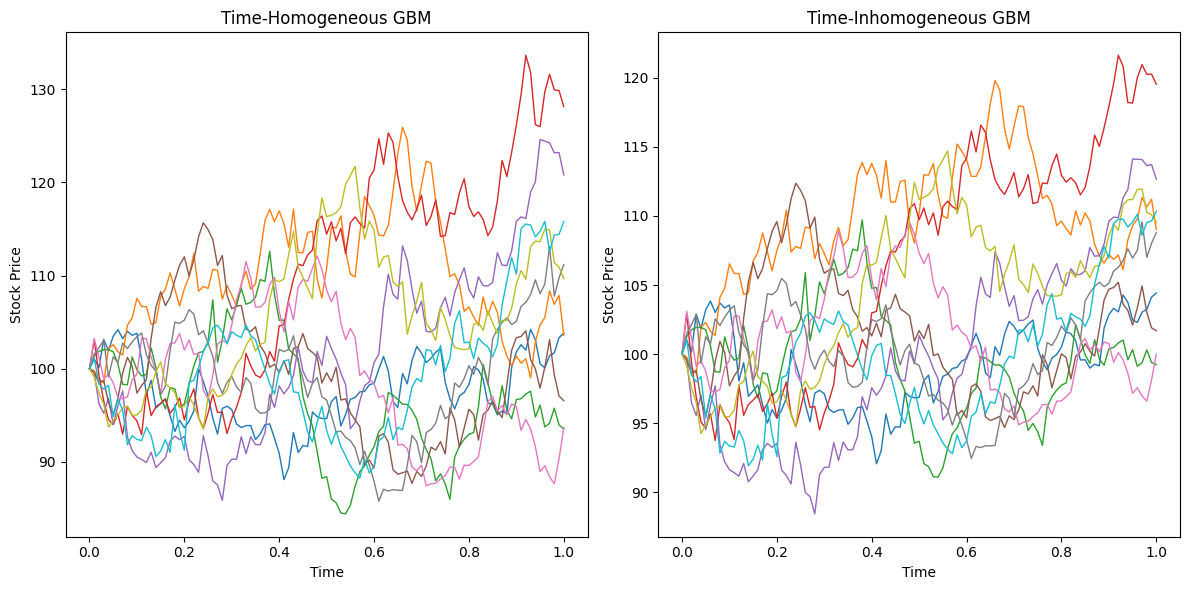

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100          # Initial stock price
T = 1.0           # Time horizon (1 year)
mu = 0.05         # Constant drift
sigma = 0.2       # Volatility
timesteps = 100
N_paths = 10      # Number of paths

dt = T / timesteps
time_grid = np.linspace(0, T, timesteps + 1)

# 1. Time-Homogeneous GBM
paths_hom = np.zeros((N_paths, timesteps + 1))
paths_hom[:, 0] = S0

# 2. Time-Inhomogeneous GBM (time-varying drift and volatility)
paths_inhom = np.zeros((N_paths, timesteps + 1))
paths_inhom[:, 0] = S0

np.random.seed(42)  # For reproducibility

for i in range(1, timesteps + 1):
    t = time_grid[i]
    z = np.random.randn(N_paths)

    # Time-homogeneous
    paths_hom[:, i] = paths_hom[:, i - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Time-inhomogeneous: drift increases linearly, volatility decreases with sqrt time
    mu_t = mu * (1 + 0.5 * t)
    sigma_t = sigma * (1 - 0.5 * np.sqrt(t))
    paths_inhom[:, i] = paths_inhom[:, i - 1] * np.exp((mu_t - 0.5 * sigma_t**2) * dt + sigma_t * np.sqrt(dt) * z)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(time_grid, paths_hom.T, lw=1)
plt.title("Time-Homogeneous GBM")
plt.xlabel("Time")
plt.ylabel("Stock Price")

plt.subplot(1, 2, 2)
plt.plot(time_grid, paths_inhom.T, lw=1)
plt.title("Time-Inhomogeneous GBM")
plt.xlabel("Time")
plt.ylabel("Stock Price")

plt.tight_layout()
plt.show()


C:\Users\mohxm\AppData\Local\Temp\ipykernel_2820\1377951257.py:28: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  integral_sigma = np.sum(sigma(t, tau[k]) * sigma(t, tau[k]) * dt for k in range(i, N))


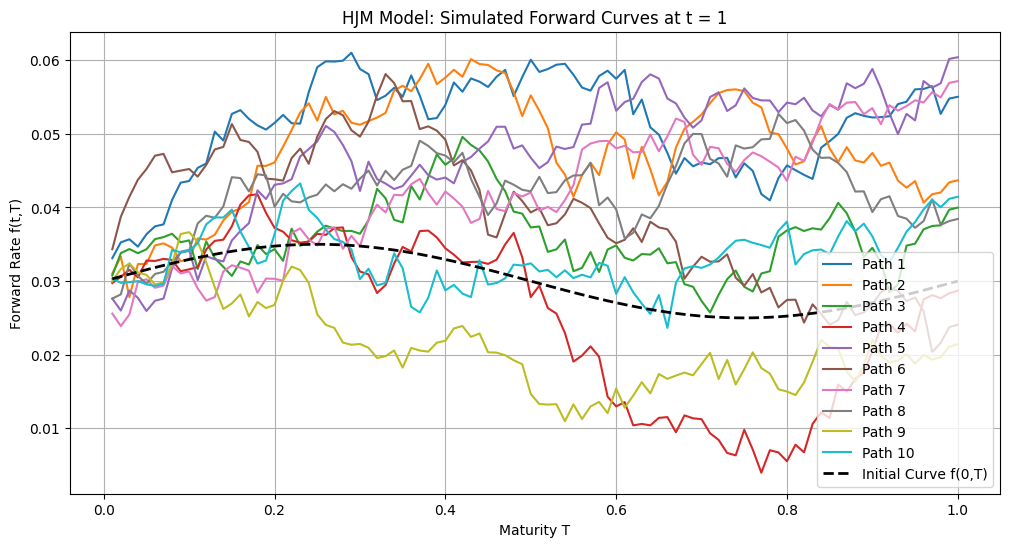

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# HJM parameters
T = 1.0             # Total time (1 year)
N = 100             # Time steps
dt = T / N          # Time step size
M = 10              # Number of simulated paths
tau = np.linspace(0.01, 1, N)  # Time to maturities (avoid zero)

# Volatility function (e.g., exponential decay)
def sigma(t, T):
    return 0.02 * np.exp(-0.3 * (T - t))

# Initialize forward rate curve f(0, T)
f0 = 0.03 + 0.005 * np.sin(2 * np.pi * tau)

# Simulate forward rate dynamics using Euler-Maruyama
f_paths = np.zeros((M, N, N))
for m in range(M):
    f_paths[m, 0, :] = f0.copy()
    for i in range(1, N):
        t = i * dt
        dW = np.random.normal(0, np.sqrt(dt))
        for j in range(N):
            T_j = tau[j]
            if T_j >= t:
                integral_sigma = np.sum(sigma(t, tau[k]) * sigma(t, tau[k]) * dt for k in range(i, N))
                drift = sigma(t, T_j) * integral_sigma
                diffusion = sigma(t, T_j) * dW
                f_paths[m, i, j] = f_paths[m, i-1, j] + drift * dt + diffusion
            else:
                f_paths[m, i, j] = f_paths[m, i-1, j]  # No change before maturity

# Plot simulated forward curves
plt.figure(figsize=(12, 6))
for m in range(M):
    plt.plot(tau, f_paths[m, -1, :], label=f'Path {m+1}')
plt.plot(tau, f0, 'k--', lw=2, label='Initial Curve f(0,T)')
plt.xlabel('Maturity T')
plt.ylabel('Forward Rate f(t,T)')
plt.title('HJM Model: Simulated Forward Curves at t = 1')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import numpy as np

# Parameters
S0 = 100        # Initial stock price
K = 105         # Strike price
u = 1.2         # Up factor
d = 0.9         # Down factor
r = 0.05        # Risk-free rate
dt = 1          # Time step (1 year)

# Discount factor
discount = np.exp(-r * dt)

# Risk-neutral probability
p = (np.exp(r * dt) - d) / (u - d)

# Stock prices at maturity
Su = S0 * u
Sd = S0 * d

# Call option payoff at maturity
Cu = max(0, Su - K)
Cd = max(0, Sd - K)

# Option price today (t=0)
C0 = discount * (p * Cu + (1 - p) * Cd)

print(f"One-Period Binomial Model:")
print(f"Stock Price Up: {Su:.2f}, Down: {Sd:.2f}")
print(f"Option Payoff Up: {Cu:.2f}, Down: {Cd:.2f}")
print(f"Option Price Today: {C0:.2f}")


One-Period Binomial Model:
Stock Price Up: 120.00, Down: 90.00
Option Payoff Up: 15.00, Down: 0.00
Option Price Today: 7.19


In [22]:
import numpy as np
import matplotlib.pyplot as plt

class BinomialOptionVisualizer:
    def __init__(self, S0, K, T, r, sigma, N, option_type='call', exercise_type='european'):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.N = N
        self.dt = T / N
        self.discount = np.exp(-r * self.dt)
        self.option_type = option_type.lower()
        self.exercise_type = exercise_type.lower()

        # CRR model parameters
        self.u = np.exp(sigma * np.sqrt(self.dt))
        self.d = 1 / self.u
        self.p = (np.exp(r * self.dt) - self.d) / (self.u - self.d)

        self.ST = np.zeros((N + 1, N + 1))  # Asset prices
        self.OPT = np.zeros((N + 1, N + 1))  # Option values

    def _payoff(self, S):
        if self.option_type == 'call':
            return max(S - self.K, 0)
        elif self.option_type == 'put':
            return max(self.K - S, 0)
        else:
            raise ValueError("option_type must be 'call' or 'put'")

    def price(self, visualize_tree=True):
        # Fill stock price tree
        for i in range(self.N + 1):
            for j in range(i + 1):
                self.ST[j, i] = self.S0 * (self.u ** (i - j)) * (self.d ** j)

        # Option values at maturity
        for j in range(self.N + 1):
            self.OPT[j, self.N] = self._payoff(self.ST[j, self.N])

        # Backward induction
        for i in range(self.N - 1, -1, -1):
            for j in range(i + 1):
                hold = self.discount * (self.p * self.OPT[j, i + 1] + (1 - self.p) * self.OPT[j + 1, i + 1])
                if self.exercise_type == 'european':
                    self.OPT[j, i] = hold
                else:
                    exercise = self._payoff(self.ST[j, i])
                    self.OPT[j, i] = max(hold, exercise)

        if visualize_tree:
            self.plot_tree()
        return self.OPT[0, 0]

    def plot_tree(self):
        fig, ax = plt.subplots(figsize=(12, 6))
        for i in range(self.N + 1):
            for j in range(i + 1):
                x = i
                y = self.ST[j, i]
                ax.plot(x, y, 'bo')
                ax.text(x, y, f"{self.OPT[j, i]:.2f}", fontsize=8, color='red', ha='center')

        ax.set_title(f"Binomial Tree for {self.exercise_type.capitalize()} {self.option_type.capitalize()} Option")
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Stock Price")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


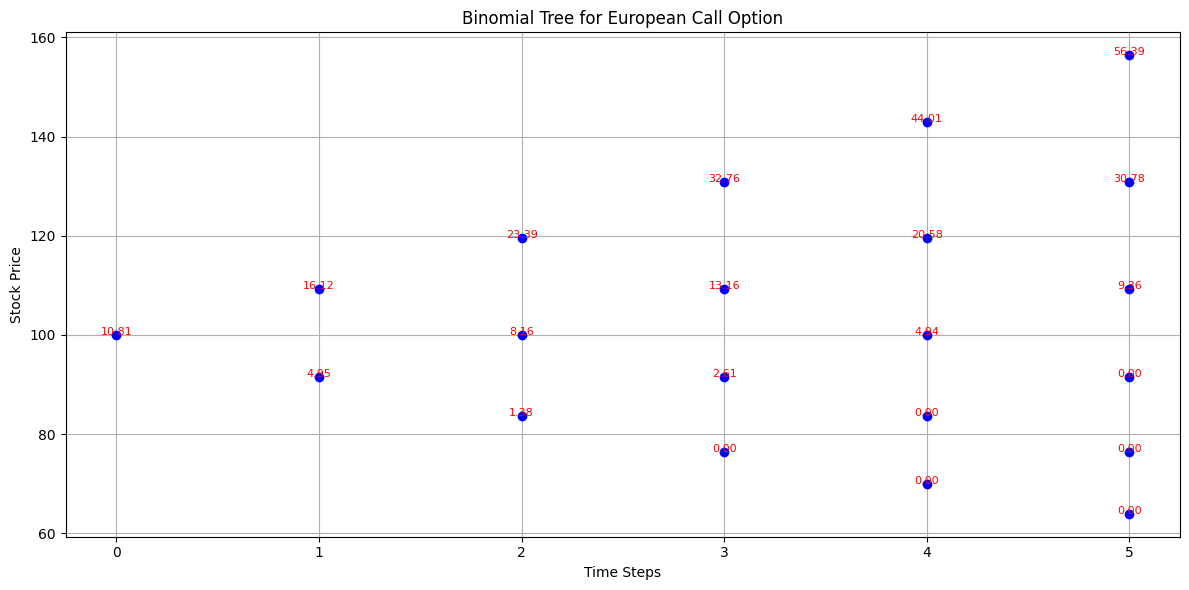

Option Price: 10.8059


In [23]:
option = BinomialOptionVisualizer(
    S0=100, K=100, T=1, r=0.05,
    sigma=0.2, N=5,                # Use small N for readable tree
    option_type='call',
    exercise_type='european'
)

price = option.price()
print(f"Option Price: {price:.4f}")


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

def arrow_debreu_prices(S0, r, sigma, T, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    discount = np.exp(-r * dt)
    tree = np.zeros((N+1, N+1))  # [j][n] = price at node j at time n

    for n in range(N+1):
        for j in range(n+1):
            probability = comb(n, j) * (p**j) * ((1-p)**(n-j))
            tree[j][n] = probability * np.exp(-r * n * dt)

    return tree, u, d, p

def plot_arrow_debreu(tree, S0, u, d, N):
    fig, ax = plt.subplots(figsize=(12, 6))
    for n in range(N+1):
        for j in range(n+1):
            S = S0 * (u ** (j)) * (d ** (n - j))
            π = tree[j][n]
            ax.plot(n, S, 'bo')
            ax.text(n, S, f"{π:.4f}", fontsize=8, color='green', ha='center')

    ax.set_title("Arrow-Debreu Securities Prices in Binomial Tree")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Stock Price")
    plt.grid(True)
    plt.show()


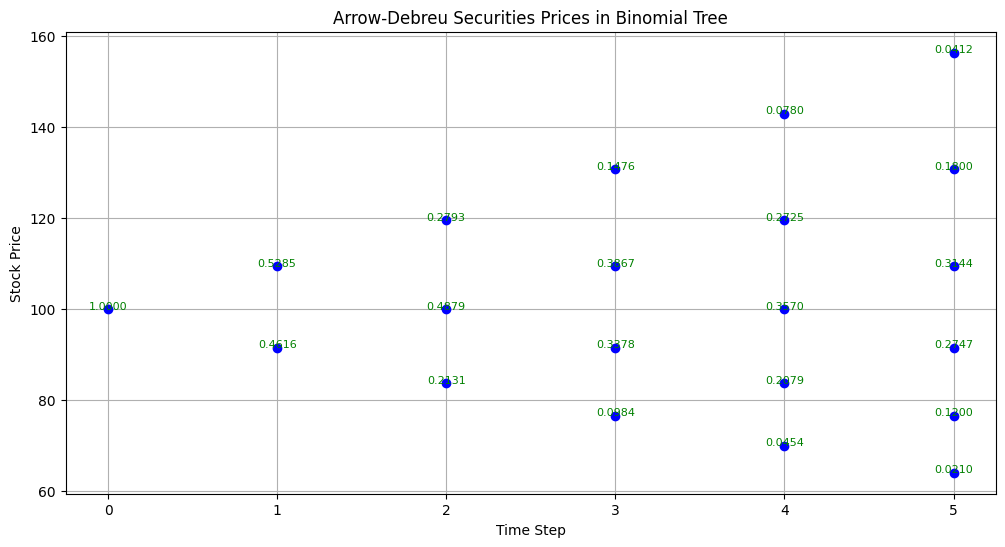

In [25]:
S0, r, sigma, T, N = 100, 0.05, 0.2, 1, 5
tree, u, d, p = arrow_debreu_prices(S0, r, sigma, T, N)
plot_arrow_debreu(tree, S0, u, d, N)


In [26]:
def price_option_from_arrow_debreu(S0, K, r, sigma, T, N, option_type='call'):
    tree, u, d, p = arrow_debreu_prices(S0, r, sigma, T, N)

    option_payoffs = []
    option_value = 0
    stock_prices = []

    for j in range(N+1):
        S = S0 * (u ** j) * (d ** (N - j))
        stock_prices.append(S)
        if option_type == 'call':
            payoff = max(S - K, 0)
        else:
            payoff = max(K - S, 0)
        option_payoffs.append(payoff)
        option_value += tree[j][N] * payoff

    return option_value, stock_prices, option_payoffs, tree, u, d

def visualize_arrow_debreu_option(S0, K, r, sigma, T, N, option_type='call'):
    option_value, stock_prices, payoffs, tree, u, d = price_option_from_arrow_debreu(
        S0, K, r, sigma, T, N, option_type)

    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title(f"European {option_type.capitalize()} Option via Arrow-Debreu (Value = {option_value:.4f})")

    for j in range(N+1):
        S = stock_prices[j]
        π = tree[j][N]
        payoff = payoffs[j]
        ax.plot(N, S, 'bo')
        ax.text(N, S, f"π={π:.3f}\nP={payoff:.2f}", fontsize=8, ha='center', color='purple')

    ax.set_xlabel("Time Step N")
    ax.set_ylabel("Stock Price at Maturity")
    plt.grid(True)
    plt.show()


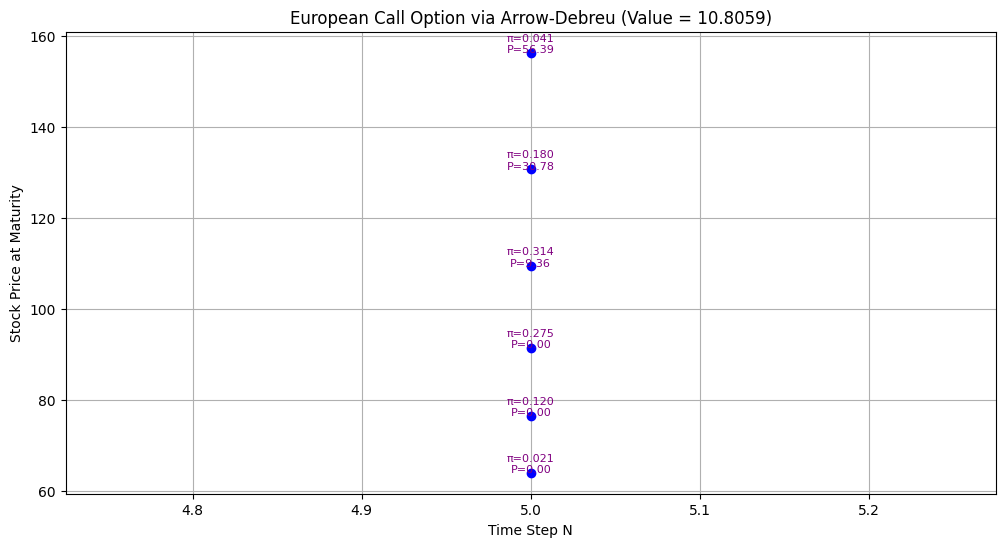

In [27]:
visualize_arrow_debreu_option(S0=100, K=100, r=0.05, sigma=0.2, T=1, N=5, option_type='call')


In [28]:
import numpy as np
import matplotlib.pyplot as plt

def digital_option_binomial(S0, K, r, sigma, T, N, option_type='call', payout=1):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Build asset price tree
    stock_tree = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock_tree[j, i] = S0 * (u**j) * (d**(i-j))

    # Build option payoff at maturity
    option_tree = np.zeros((N+1, N+1))
    for j in range(N+1):
        if option_type == 'call':
            option_tree[j, N] = payout if stock_tree[j, N] > K else 0
        else:
            option_tree[j, N] = payout if stock_tree[j, N] < K else 0

    # Backward induction for pricing
    for i in reversed(range(N)):
        for j in range(i+1):
            option_tree[j, i] = discount * (p * option_tree[j+1, i+1] + (1 - p) * option_tree[j, i+1])

    return option_tree[0, 0], stock_tree, option_tree

def visualize_digital_option(S0, K, r, sigma, T, N, option_type='call'):
    price, stock_tree, option_tree = digital_option_binomial(S0, K, r, sigma, T, N, option_type)

    print(f"Digital {option_type.capitalize()} Option Price: {price:.4f}")

    fig, ax = plt.subplots(figsize=(12, 6))
    for i in range(N+1):
        for j in range(i+1):
            S = stock_tree[j, i]
            V = option_tree[j, i]
            ax.plot(i, S, 'bo')
            ax.text(i, S, f'{V:.2f}', fontsize=8, ha='center', color='green')

    ax.set_title(f"Digital {option_type.capitalize()} Option Tree (N={N})")
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Stock Price")
    ax.grid(True)
    plt.show()


Digital Call Option Price: 0.5356


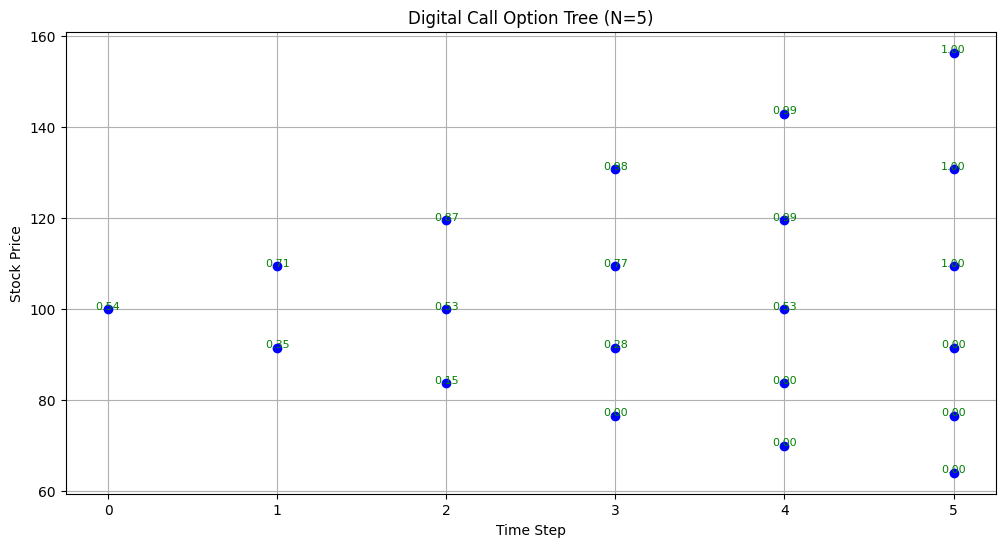

In [29]:
visualize_digital_option(S0=100, K=100, r=0.05, sigma=0.2, T=1, N=5, option_type='call')


In [30]:
import numpy as np

def one_period_binomial_replicating_portfolio(S0, K, r, sigma, T=1):
    dt = T
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    R = np.exp(r * dt)  # discount factor

    Su = S0 * u
    Sd = S0 * d

    # Payoffs
    Cu = max(Su - K, 0)  # Call
    Cd = max(Sd - K, 0)

    # Solve for Delta and B using 2 equations
    delta = (Cu - Cd) / (Su - Sd)
    B = (Cu - delta * Su) / R

    # Option price today
    C0 = delta * S0 + B

    print(f"Su = {Su:.2f}, Sd = {Sd:.2f}")
    print(f"Cu = {Cu:.2f}, Cd = {Cd:.2f}")
    print(f"Delta (hedge ratio) = {delta:.4f}")
    print(f"Bond (B) = {B:.4f}")
    print(f"Replicating Portfolio Value (C0) = {C0:.4f}")

    return C0, delta, B


In [31]:
S0 = 100     # Initial stock price
K = 100      # Strike
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility

one_period_binomial_replicating_portfolio(S0, K, r, sigma)


Su = 122.14, Sd = 81.87
Cu = 22.14, Cd = 0.00
Delta (hedge ratio) = 0.5498
Bond (B) = -42.8211
Replicating Portfolio Value (C0) = 12.1623


(np.float64(12.162284964623943),
 np.float64(0.549833997312478),
 np.float64(-42.82111476662385))

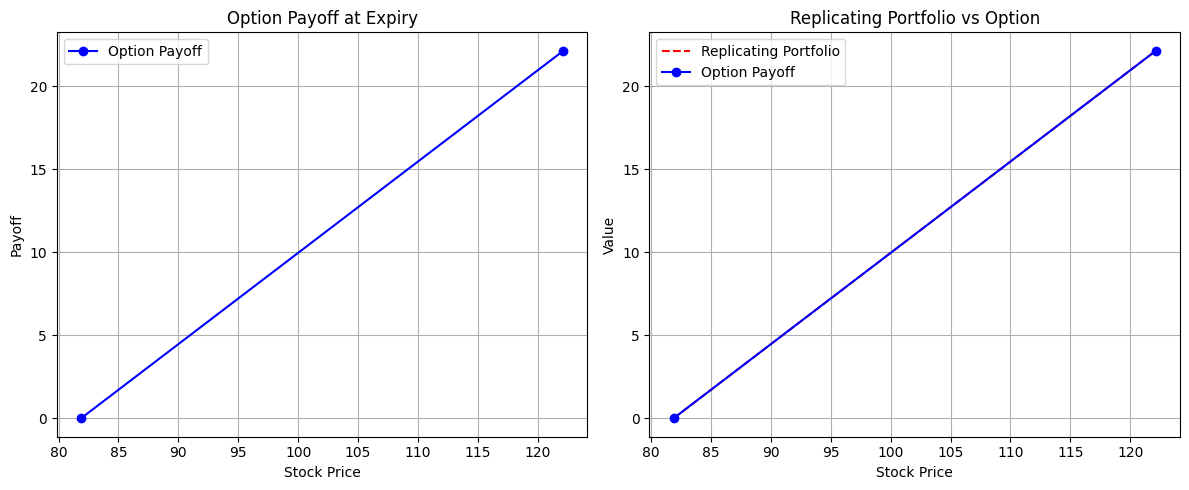

{'Delta (hedge ratio)': np.float64(0.549833997312478), 'Bond Position (B)': np.float64(-42.82111476662385), 'Option Value Today (C0)': np.float64(12.162284964623943)}


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def replicate_portfolio_visual(S0, K, r, sigma, T=1):
    dt = T
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    R = np.exp(r * dt)

    Su = S0 * u
    Sd = S0 * d

    Cu = max(Su - K, 0)
    Cd = max(Sd - K, 0)

    delta = (Cu - Cd) / (Su - Sd)
    B = (Cu - delta * Su) / R
    C0 = delta * S0 + B

    # Plotting the stock vs option payoffs
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot([Sd, Su], [Cd, Cu], 'bo-', label='Option Payoff')
    ax[0].set_title('Option Payoff at Expiry')
    ax[0].set_xlabel('Stock Price')
    ax[0].set_ylabel('Payoff')
    ax[0].legend()
    ax[0].grid(True)

    replicate_payoff = [delta * s + B * R for s in [Sd, Su]]
    ax[1].plot([Sd, Su], replicate_payoff, 'r--', label='Replicating Portfolio')
    ax[1].plot([Sd, Su], [Cd, Cu], 'bo-', label='Option Payoff')
    ax[1].set_title('Replicating Portfolio vs Option')
    ax[1].set_xlabel('Stock Price')
    ax[1].set_ylabel('Value')
    ax[1].legend()
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    return {
        "Delta (hedge ratio)": delta,
        "Bond Position (B)": B,
        "Option Value Today (C0)": C0
    }

# Example parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.2
T = 1

result = replicate_portfolio_visual(S0, K, r, sigma, T)
print(result)


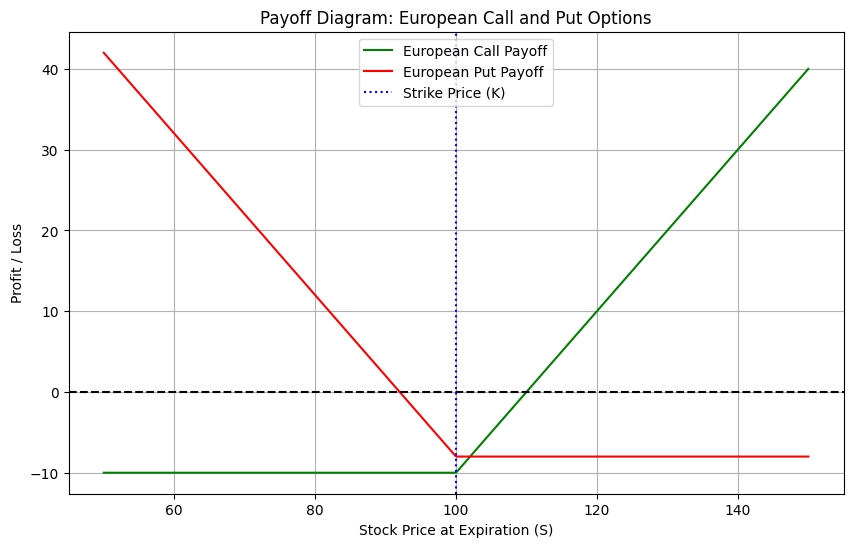

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Inputs -----
S = np.linspace(50, 150, 500)  # Range of possible stock prices at expiry
K = 100                        # Strike price
call_premium = 10             # Call option premium (price paid to buy the option)
put_premium = 8               # Put option premium

# ----- Payoff Calculations -----
call_payoff = np.maximum(S - K, 0) - call_premium
put_payoff = np.maximum(K - S, 0) - put_premium

# ----- Plotting -----
plt.figure(figsize=(10, 6))
plt.plot(S, call_payoff, label='European Call Payoff', color='green')
plt.plot(S, put_payoff, label='European Put Payoff', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(K, color='blue', linestyle=':', label='Strike Price (K)')

# ----- Styling -----
plt.title('Payoff Diagram: European Call and Put Options')
plt.xlabel('Stock Price at Expiration (S)')
plt.ylabel('Profit / Loss')
plt.legend()
plt.grid(True)
plt.show()


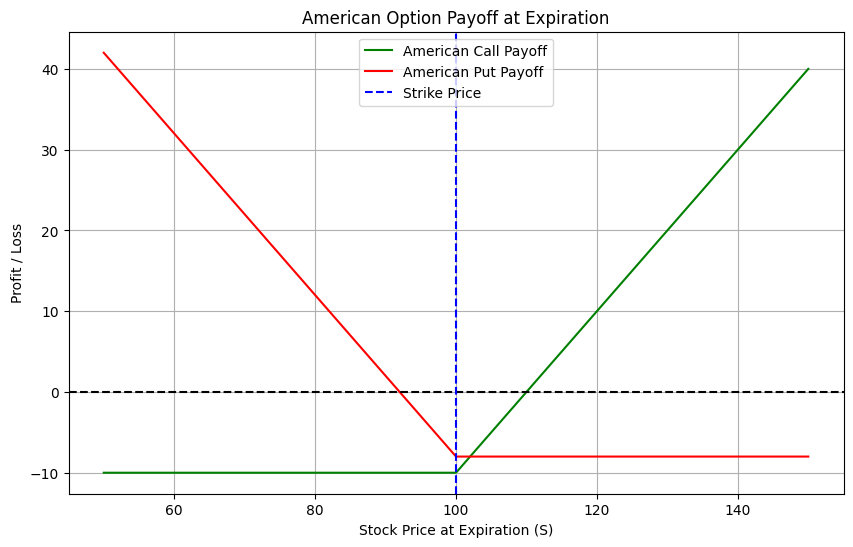

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Parameters -----
K = 100  # Strike price
call_premium = 10
put_premium = 8
S = np.linspace(50, 150, 500)  # Underlying stock price at expiry

# ----- Payoff Functions -----
call_payoff = np.maximum(S - K, 0) - call_premium
put_payoff = np.maximum(K - S, 0) - put_premium

# ----- Plotting -----
plt.figure(figsize=(10, 6))
plt.plot(S, call_payoff, label='American Call Payoff', color='green')
plt.plot(S, put_payoff, label='American Put Payoff', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(K, color='blue', linestyle='--', label='Strike Price')

# ----- Styling -----
plt.title('American Option Payoff at Expiration')
plt.xlabel('Stock Price at Expiration (S)')
plt.ylabel('Profit / Loss')
plt.grid(True)
plt.legend()
plt.show()


Hedger Net Profit: Ticker
RELIANCE.NS    0.0
dtype: float64
Speculator Profit: Ticker
RELIANCE.NS    309.300049
dtype: float64
Arbitrage Profit: 10


C:\Users\mohxm\AppData\Local\Temp\ipykernel_22172\2773019509.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  profits = [float(hedger_net), float(speculator_profit), float(arbitrage_profit)]


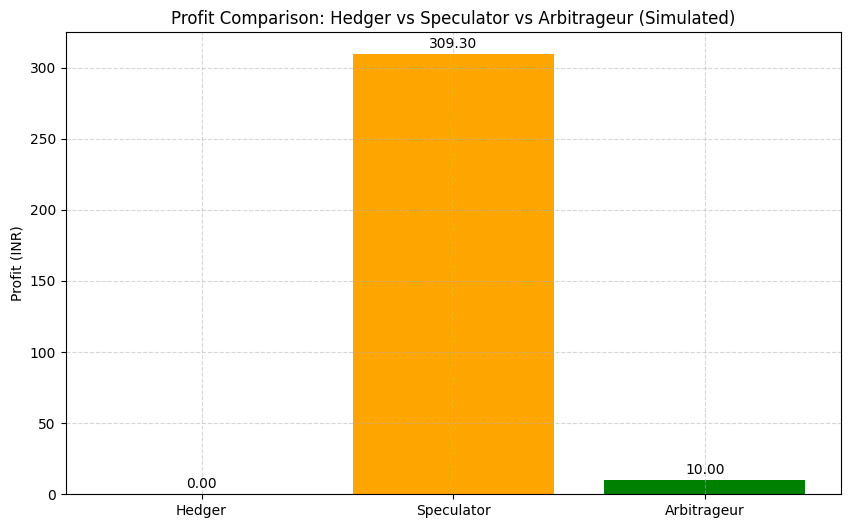

In [2]:
# Print the values for debugging
print("Hedger Net Profit:", hedger_net)
print("Speculator Profit:", speculator_profit)
print("Arbitrage Profit:", arbitrage_profit)

# Ensure all values are float for safety
profits = [float(hedger_net), float(speculator_profit), float(arbitrage_profit)]

# Plot the comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(roles, profits, color=['skyblue', 'orange', 'green'])
plt.title('Profit Comparison: Hedger vs Speculator vs Arbitrageur (Simulated)')
plt.ylabel('Profit (INR)')
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate profit values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


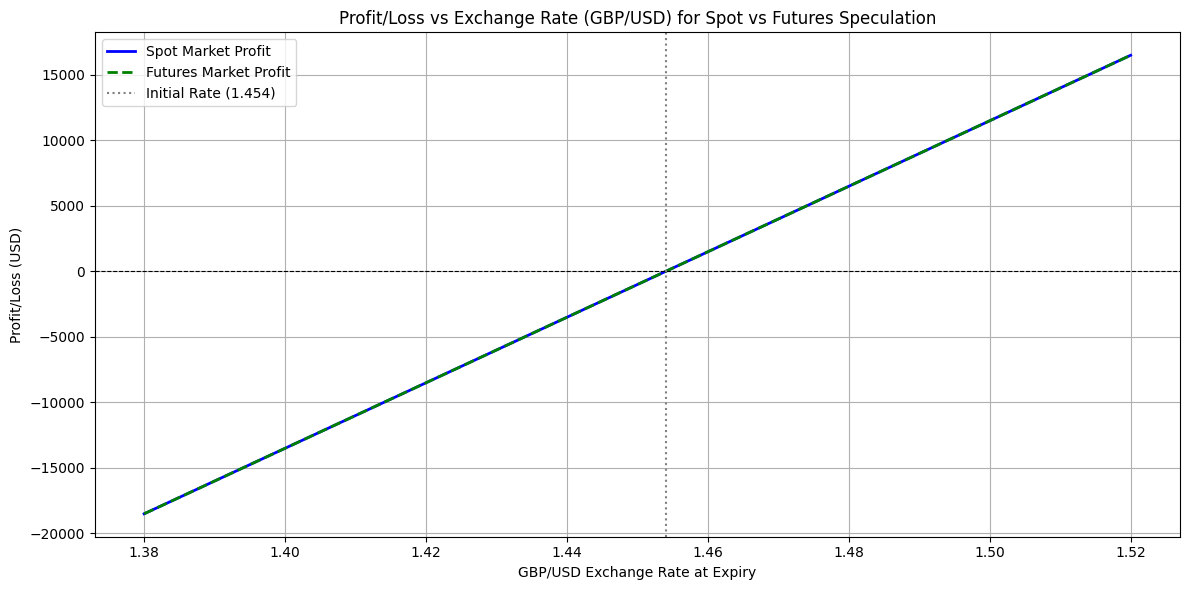

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Exchange rate scenarios
exchange_rates = np.linspace(1.38, 1.52, 100)

# Spot Market
initial_spot_price = 1.454
pounds_bought = 250000
usd_invested_spot = initial_spot_price * pounds_bought
spot_values = exchange_rates * pounds_bought
spot_profits = spot_values - usd_invested_spot

# Futures Market
futures_contract_size = 62500
num_contracts = 4
total_gbp_futures = futures_contract_size * num_contracts
initial_futures_price = 1.454
usd_equivalent_futures = initial_futures_price * total_gbp_futures
futures_values = exchange_rates * total_gbp_futures
futures_profits = futures_values - usd_equivalent_futures

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(exchange_rates, spot_profits, label='Spot Market Profit', color='blue', linewidth=2)
plt.plot(exchange_rates, futures_profits, label='Futures Market Profit', color='green', linestyle='--', linewidth=2)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(initial_spot_price, color='gray', linestyle=':', label='Initial Rate (1.454)')

plt.title('Profit/Loss vs Exchange Rate (GBP/USD) for Spot vs Futures Speculation')
plt.xlabel('GBP/USD Exchange Rate at Expiry')
plt.ylabel('Profit/Loss (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


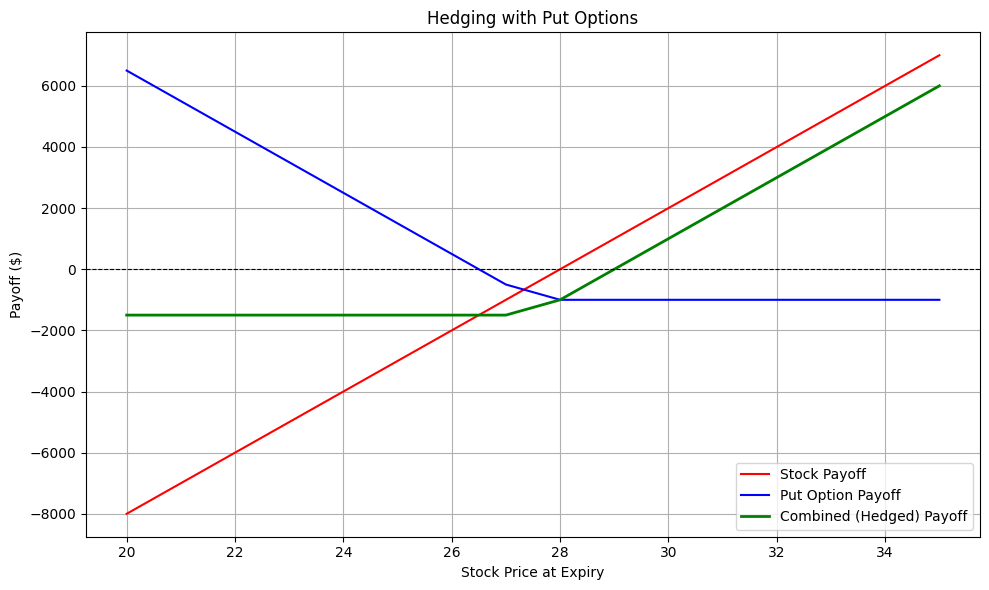

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
stock_price_bought = 28
strike_price = 27.5
premium = 1.0
shares = 1000
contract_size = 100
contracts = shares // contract_size  # 10 contracts

# Price range
stock_prices = np.arange(20, 35 + 1)

# Payoff calculations
stock_payoff = shares * (stock_prices - stock_price_bought)
option_payoff = np.where(stock_prices < strike_price,
                         contracts * contract_size * (strike_price - stock_prices),
                         0) - (premium * contracts * contract_size)
hedged_payoff = stock_payoff + option_payoff

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, stock_payoff, label='Stock Payoff', color='red')
plt.plot(stock_prices, option_payoff, label='Put Option Payoff', color='blue')
plt.plot(stock_prices, hedged_payoff, label='Combined (Hedged) Payoff', color='green', linewidth=2)

# Styling
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Hedging with Put Options')
plt.xlabel('Stock Price at Expiry')
plt.ylabel('Payoff ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


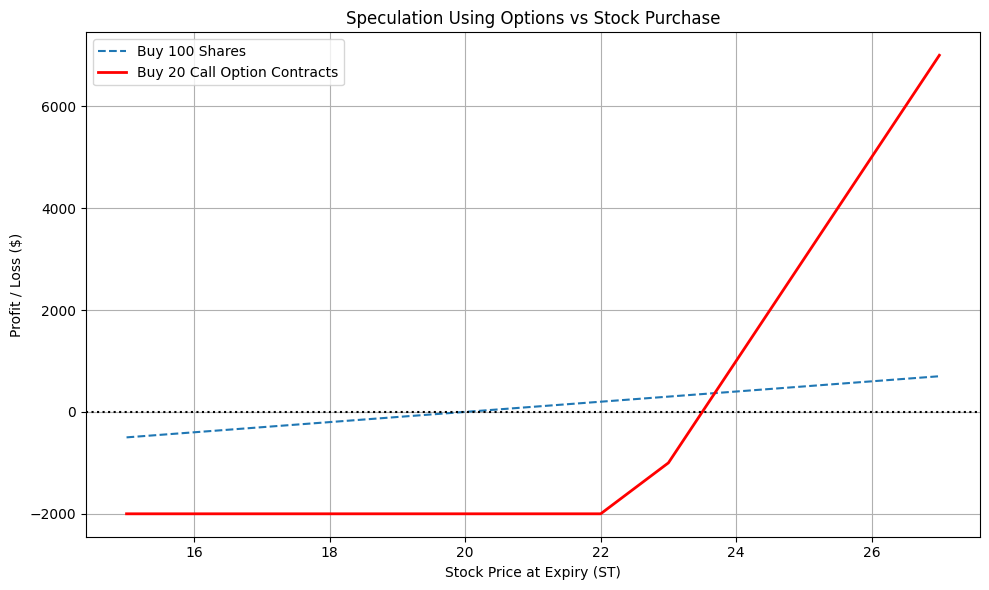

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
strike_price = 22.5
premium = 1
num_contracts = 20
option_size = 100  # shares per contract
investment = 2000
stock_purchase_qty = 100
stock_purchase_price = 20

# Final stock prices from $15 to $27
ST = np.arange(15, 28, 1)

# Profit from buying 100 shares directly
stock_profits = (ST - stock_purchase_price) * stock_purchase_qty

# Profit from buying 20 call option contracts
# Call payoff per share: max(ST - K, 0)
call_payoff_per_share = np.maximum(ST - strike_price, 0)
call_total_payoff = call_payoff_per_share * (num_contracts * option_size)
option_profits = call_total_payoff - investment  # subtract premium cost

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ST, stock_profits, label='Buy 100 Shares', linestyle='--')
plt.plot(ST, option_profits, label='Buy 20 Call Option Contracts', color='red', linewidth=2)
plt.axhline(0, color='black', linestyle=':')
plt.title("Speculation Using Options vs Stock Purchase")
plt.xlabel("Stock Price at Expiry (ST)")
plt.ylabel("Profit / Loss ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


LSE price in USD: $143.00
NYSE price: $140.00
Difference per share: $3.00
Total arbitrage profit: $300.00


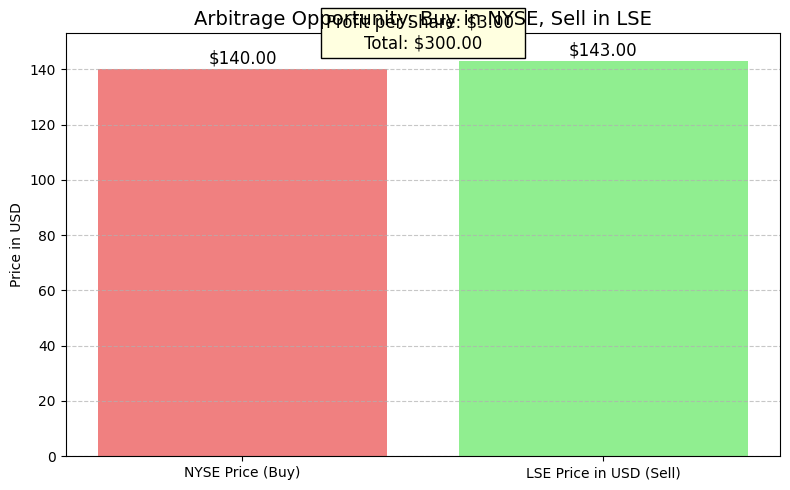

In [2]:
import matplotlib.pyplot as plt

# Parameters
lse_price_gbp = 100
exchange_rate = 1.43
lse_price_usd = lse_price_gbp * exchange_rate
nyse_price = 140
shares = 100

# Arbitrage calculation
difference_per_share = lse_price_usd - nyse_price
profit = difference_per_share * shares

# Print the calculation
print(f"LSE price in USD: ${lse_price_usd:.2f}")
print(f"NYSE price: ${nyse_price:.2f}")
print(f"Difference per share: ${difference_per_share:.2f}")
print(f"Total arbitrage profit: ${profit:.2f}")

# 📊 Visualization
labels = ['NYSE Price (Buy)', 'LSE Price in USD (Sell)']
prices = [nyse_price, lse_price_usd]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize=(8,5))
bars = plt.bar(labels, prices, color=colors)
plt.title("Arbitrage Opportunity: Buy in NYSE, Sell in LSE", fontsize=14)
plt.ylabel("Price in USD")

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'${yval:.2f}', ha='center', va='bottom', fontsize=12)

# Show profit annotation
plt.text(0.5, max(prices) + 3, f'Profit per Share: ${difference_per_share:.2f} \nTotal: ${profit:.2f}', 
         ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='lightyellow', edgecolor='black'))

plt.ylim(0, max(prices) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


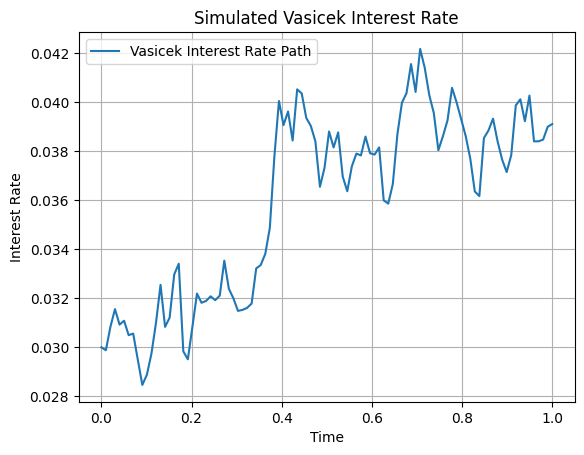

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.15        # Speed of mean reversion
b = 0.05        # Long-term mean interest rate
sigma = 0.01    # Volatility
r0 = 0.03       # Initial interest rate
T = 1.0         # Time horizon (1 year)
dt = 0.01       # Time step
N = int(T / dt) # Number of steps

# Time grid
t = np.linspace(0, T, N)
r = np.zeros(N)
r[0] = r0

# Simulate the process
for i in range(1, N):
    dr = a * (b - r[i-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
    r[i] = r[i-1] + dr

# Plot
plt.plot(t, r, label="Vasicek Interest Rate Path")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.title("Simulated Vasicek Interest Rate")
plt.grid(True)
plt.legend()
plt.show()
